In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import ipywidgets
from plot_utils import get_model_names_for_degree

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

['chebyshev_linear_regression_big_2x' 'chebyshev_linear_regression_toy'
 'chebyshev_linear_regression_toy_0.2_noise'
 'chebyshev_linear_regression_toy_0.5_noise_0.00005_lr'
 'chebyshev_linear_regression_toy_11_take_1'
 'chebyshev_linear_regression_toy_16_layers'
 'chebyshev_linear_regression_toy_chebyshev_as_baseline_for_loss'
 'chebyshev_linear_regression_toy_just_base_8'
 'chebyshev_linear_regression_toy_noise'
 'chebyshev_linear_regression_toy_standard_0.00005_lr_no_noise_no_curriculum'
 'chebyshev_linear_regression_toy_uniform_sampling'
 'chebyshev_linear_regression_toy_weighted_mse' 'curriculum'
 'kernel_linear_regression_toy_basis_4'
 'kernel_linear_regression_toy_basis_4_dim_1'
 'kernel_linear_regression_toy_basis_4_normalized'
 'kernel_linear_regression_toy_basis_4_normalized_x_scale_2'
 'kernel_linear_regression_toy_dim_20_basis_2'
 'kernel_linear_regression_toy_just_basis_4_log' 'lr00005'
 'with_curriculum']
                                   run_id                      task 

run_id                      task  \
53                    chebyshev-2x-0.0001  kernel_linear_regression   
32   694f986c-02ab-4898-80fc-f417cd6b407d            soft_prompting   
33   4ffe0581-f026-4625-9c6a-c6fa5a2ff70c            soft_prompting   
34   bc700f2e-37d7-4422-9f82-8284aad8a27b            soft_prompting   
35   e42e2a2e-d661-4bb9-acf8-b09c40fc5e5a            soft_prompting   
..                                    ...                       ...   
70           basis-4-normalized-x-scale-2  kernel_linear_regression   
38  high-dimension-joint-linear-quadratic  kernel_linear_regression   
52   a6c28d4b-4687-4631-9f46-1f5acbe1c18c  kernel_linear_regression   
76                               lr_00005  kernel_linear_regression   
60                                   cur2  kernel_linear_regression   

                              model  \
53                 Transformer-plus   
32  chebyshev_linear_regression_toy   
33  chebyshev_linear_regression_toy   
34  chebyshev_linear_regression_toy   
35  chebyshev_linear_regression_toy   
..                              ...   
70                      Transformer   
38                      Transformer   
52                      Transformer   
76                      Transformer   
60                      Transformer   

                                               kwargs  num_tasks  \
53  basis_dim=11_different_degrees=True_highest_de...         -1   
32                               basis_dim=5_degree=5         -1   
33                               basis_dim=5_degree=5         -1   
34                               basis_dim=5_degree=5         -1   
35  basis_dim=3_different_degrees=False_highest_de...         -1   
..                                                ...        ...   
70                                        basis_dim=4         -1   
38                                        basis_dim=2         -1   
52                                        basis_dim=4         -1   
76  basis_dim=11_different_degrees=True_highest_de...         -1   
60  basis_dim=11_different_degrees=True_lowest_deg...         -1   

    num_examples  n_dims  n_layer  n_head  \
53            -1       1       24      16   
32            -1       1        6       4   
33            -1       1        6       4   
34            -1       1        6       4   
35            -1       1        6       4   
..           ...     ...      ...     ...   
70            -1       5       12       8   
38            -1      20       12       8   
52            -1       5       12       8   
76            -1       1       12       8   
60            -1       1       12       8   

                                             run_name  
53                 chebyshev_linear_regression_big_2x  
32                    chebyshev_linear_regression_toy  
33                    chebyshev_linear_regression_toy  
34                    chebyshev_linear_regression_toy  
35                    chebyshev_linear_regression_toy  
..                                                ...  
70  kernel_linear_regression_toy_basis_4_normalize...  
38        kernel_linear_regression_toy_dim_20_basis_2  
52      kernel_linear_regression_toy_just_basis_4_log  
76                                            lr00005  
60                                    with_curriculum  

[79 rows x 10 columns]

In [3]:
task = "kernel_linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "soft-prompting-test-6"  # if you train more models, replace with the run_id from the table above
#run_id = "lr_00005"
run_path = os.path.join(run_dir, "soft_prompting", run_id)


run_id_big = "small-1-11-5M-steps"
run_path_big = os.path.join(run_dir, task, run_id_big)

#run_id_noise_2 = "0.25x-micro-no-noise-batch-8192-basis-1-4-500k"
#run_path_noise_2 = os.path.join(run_dir, task, run_id_noise_2) 


#run_path = '/home/riadoshi/CS182Project/models/kernel_linear_regression/cde31f7a-93a0-4aa6-b833-37e178b50ae4' # enter the path to the downloaded checkpoint here
metrics = get_run_metrics(run_path, run_path_big, None, include_noise=False, ground_truth_loss=False, smoothing=0.00)  # these are normally precomputed at the end of training


torch.Size([1, 128])
PROMPT:  tensor([[[0.8780],
         [0.2665],
         [0.6323],
         [0.1253],
         [0.2460],
         [0.2789],
         [0.1814],
         [0.5925],
         [0.0493],
         [0.2297],
         [0.6476],
         [0.8623],
         [0.3821],
         [0.7960],
         [1.0132],
         [0.5370],
         [0.1190],
         [0.5629],
         [0.0410],
         [0.0983]]], grad_fn=<UnsafeViewBackward0>)
Orthogonal component:  tensor(17.3108, grad_fn=<CopyBackwards>)
total norm:  tensor(41.9293, grad_fn=<CopyBackwards>)
../models/soft_prompting/soft-prompting-test-6/metrics.json
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
{'degree-4': {'chebyshev_4_driver=None': {'mean': [0.28616684675216675, 0.24343135952949524, 0.16736528277397156, 0.07440228760242462, 0.02121327631175518, 1.5342988263000734e-05, 1.1489749152104878e-09, 8.341159707381252e-11, 1.2435179622127812e-11, 6.601573129295935e-13, 2.0534828178153663e-12, 4.035531403403375e-13, 1.378799011813106e-13, 2.0

# Plot pre-computed metrics

../models
chebyshev_linear_regression_toy soft-prompting-test-6
torch.Size([1, 128])
PROMPT:  tensor([[[0.8780],
         [0.2665],
         [0.6323],
         [0.1253],
         [0.2460],
         [0.2789],
         [0.1814],
         [0.5925],
         [0.0493],
         [0.2297],
         [0.6476],
         [0.8623],
         [0.3821],
         [0.7960],
         [1.0132],
         [0.5370],
         [0.1190],
         [0.5629],
         [0.0410],
         [0.0983]]], grad_fn=<UnsafeViewBackward0>)
Orthogonal component:  tensor(17.3108, grad_fn=<CopyBackwards>)
total norm:  tensor(41.9293, grad_fn=<CopyBackwards>)
../models/soft_prompting/soft-prompting-test-6/metrics.json
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
{'degree-4': {'chebyshev_4_driver=None': {'mean': [0.28616684675216675, 0.24343135952949524, 0.16736528277397156, 0.07440228760242462, 0.02121327631175518, 1.5342988263000734e-05, 1.1489749152104878e-09, 8.341159707381252e-11, 1.2435179622127812e-11, 6.601573129295935e-13, 2.0534828

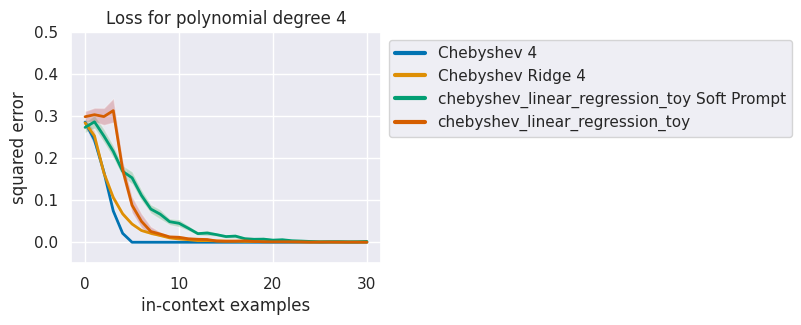

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 5', 'Chebyshev Ridge 5', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


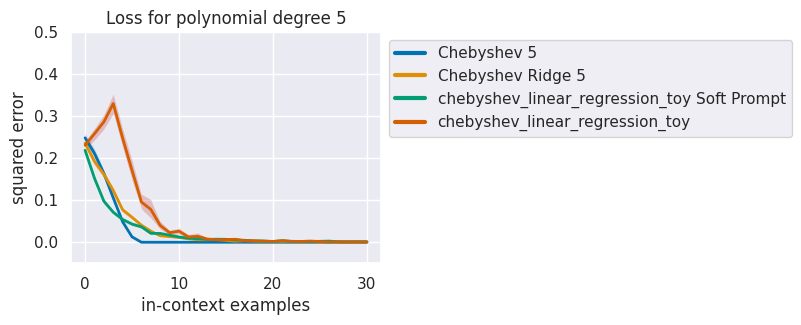

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 6', 'Chebyshev Ridge 6', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


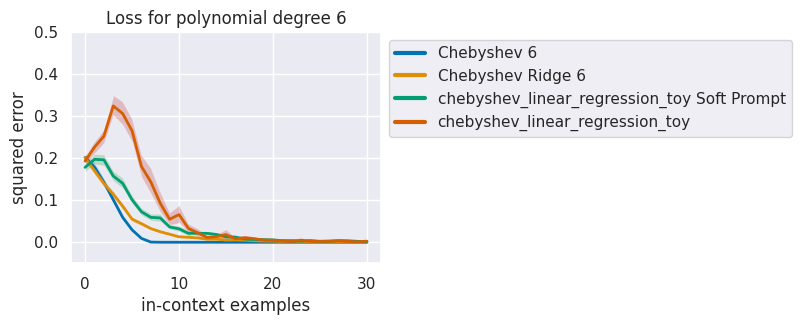

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 7', 'Chebyshev Ridge 7', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


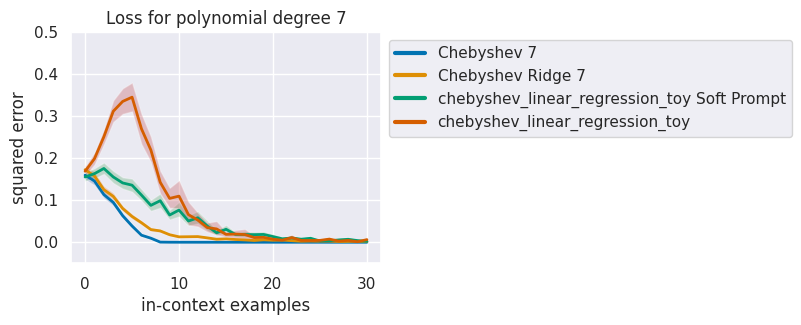

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 8', 'Chebyshev Ridge 8', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


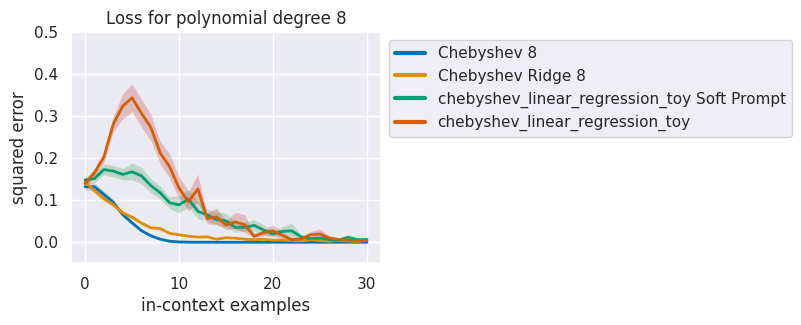

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 9', 'Chebyshev Ridge 9', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


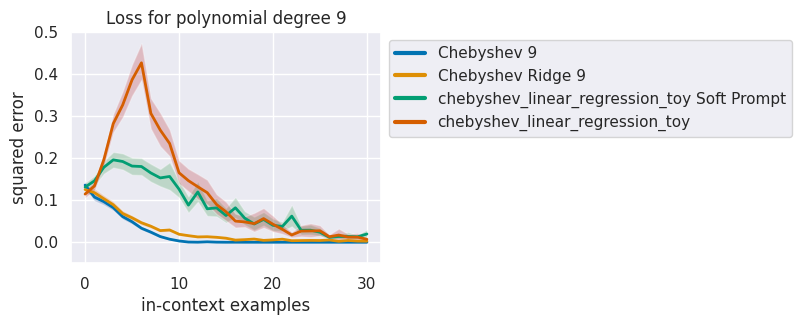

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 10', 'Chebyshev Ridge 10', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


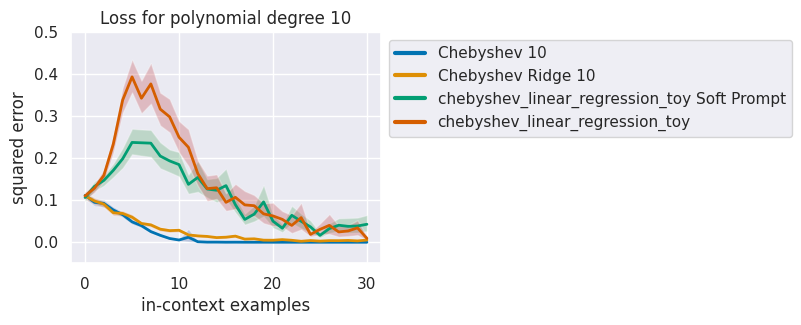

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 11', 'Chebyshev Ridge 11', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


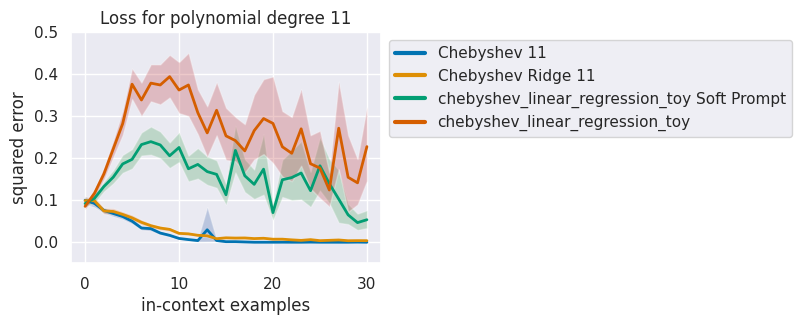

In [5]:
def valid_row(r, run_id):
    return r.task == "soft_prompting" and r.run_id == run_id

print(run_dir)
metrics = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.00)

#metrics_smooth = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.01)
#metrics_big = collect_results(run_dir, df, valid_row= lambda x: valid_row(x, run_id_big), smoothing=0.00)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

#for k, v in metrics_big.items():
#    for k2, v2 in v.items():
#        if "Transformer" in k2:
#            metrics[k][k2] = v2
#for k, v in metrics_smooth.items():
#    for k2, v2 in v.items():
#        if "Transformer" in k2:
#            metrics[k][k2+ " Smoothed"] = v2

ylims = [2, 2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
for degree in range(4, 12):
    models = get_model_names_for_degree(degree)
    print(models)
    print(metrics.keys())
    print(metrics["degree-" + str(degree)].keys())
    basic_plot(metrics["degree-" + str(degree)], models=models, ylim=ylims[degree-1])
    plt.title("Loss for polynomial degree " + str(degree))
    plt.savefig("graphs/degree-" + str(degree) + ".png", dpi=300, bbox_inches='tight')
    plt.show()